In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from keras import regularizers

In [5]:
train_dir = './chest_xray/train'
test_dir = './chest_xray/test'

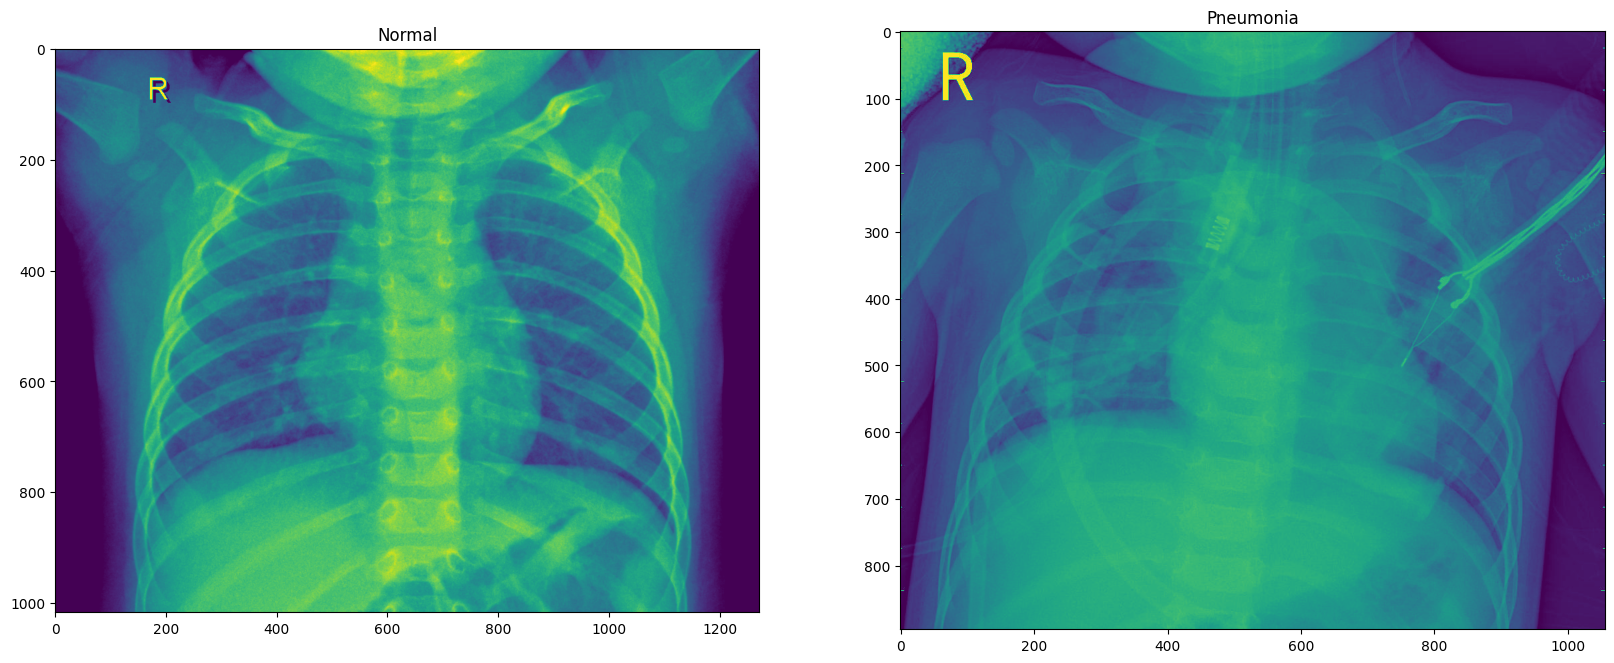

In [10]:
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the directory paths for normal and pneumonia training images
TRAIN_NORMAL = "chest_xray/train/NORMAL"
TRAIN_PNEUMONIA = "chest_xray/train/PNEUMONIA"

# Choose a random image from the normal and pneumonia directories
random_normal_image = random.choice(os.listdir(TRAIN_NORMAL))
random_pneumonia_image = random.choice(os.listdir(TRAIN_PNEUMONIA))

# Open the selected images
normal_image = Image.open(os.path.join(TRAIN_NORMAL, random_normal_image))
pneumonia_image = Image.open(os.path.join(TRAIN_PNEUMONIA, random_pneumonia_image))

# Create a figure for displaying the images
figure = plt.figure(figsize=(20, 10))

# Display the normal image in the first subplot
subplot1 = figure.add_subplot(1, 2, 1)
plt.imshow(normal_image)
subplot1.set_title("Normal")

# Display the pneumonia image in the second subplot
subplot2 = figure.add_subplot(1, 2, 2)
plt.imshow(pneumonia_image)
subplot2.set_title("Pneumonia")

# Show the figure
plt.show()

In [11]:
# Instantiate the Adam optimizer
adam_optimizer = optimizers.Adam(learning_rate=0.001)

In [12]:
train_gen = ImageDataGenerator(shear_range=0.2,horizontal_flip=True,rescale=1.0/255)

test_gen = ImageDataGenerator(rescale=1.0/255)
train_set = train_gen.flow_from_directory(directory="chest_xray/train",
                                                target_size = (128,128),
                                                batch_size = 32,
                                                class_mode="binary")
test_set = test_gen.flow_from_directory(directory="chest_xray/test",
                                                target_size = (128,128),
                                                batch_size = 32,
                                                class_mode="binary")

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu", input_shape=(128,128,3),name="conv_1.1"))
model.add(Conv2D(32,(3,3),activation="relu",name="conv_1.2"))
model.add(MaxPooling2D((2,2),name="pool_1"))

model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_2.1"))
model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_2.2"))
model.add(MaxPooling2D((2,2),name="pool_2"))

model.add(SeparableConv2D(64,(3,3),name="conv_3.1"))
model.add(BatchNormalization(name='bn_3.1'))
model.add(Activation("relu"))
model.add(SeparableConv2D(64,(3,3),activation="relu",name="conv_3.2"))
model.add(MaxPooling2D((2,2),name="pool_3"))

model.add(SeparableConv2D(128,(3,3),name="conv_4.1"))
model.add(BatchNormalization(name='bn_4.1'))
model.add(Activation("relu"))
model.add(SeparableConv2D(128,(3,3),activation="relu",name="conv_4.2"))
model.add(MaxPooling2D((2,2),name="pool_4"))

model.add(Flatten())

model.add(Dense(activation="relu",units=128, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7,name="Drop_2"))
model.add(Dense(activation="sigmoid",units=1))

In [14]:
model.compile(optimizer=adam_optimizer,loss = "binary_crossentropy", metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1.1 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1.2 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2.1 (SeparableConv2D)      │ (None, 60, 60, 64)     │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2.2 (SeparableConv2D)      │ (None, 58, 58, 64)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3.1 (SeparableConv2D)      │ (None, 27, 27, 64)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_3.1 (BatchNormalization)     │ (None, 27, 27, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3.2 (SeparableConv2D)      │ (None, 25, 25, 64)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_3 (MaxPooling2D)           │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_4.1 (SeparableConv2D)      │ (None, 10, 10, 128)    │         8,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_4.1 (BatchNormalization)     │ (None, 10, 10, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_4.2 (SeparableConv2D)      │ (None, 8, 8, 128)      │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_4 (MaxPooling2D)           │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_2 (Dropout)                │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,481 (1.21 MB)

 Trainable params: 316,097 (1.21 MB)

 Non-trainable params: 384 (1.50 KB)

In [16]:
# Define the file path for saving the best model weights
filepath = "weights.best.keras"

# Create a model checkpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# List of callbacks to be used during training
callbacks_list = [checkpoint]

# Train the model using the data generators
xray_model = model.fit(
    train_set,
    steps_per_epoch=163,              # Number of batches of samples to draw from the training generator
    callbacks=callbacks_list,         # List of callbacks to apply during training
    epochs=20,                        # Number of epochs to train the model
    validation_data=test_set,         # Validation data to evaluate the loss and any model metrics at the end of each epoch
    validation_steps=624 // 32        # Number of batches of samples to draw from the validation generator
)

Epoch 1/20


d:\Anaconda\envs\streamlit\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 908ms/step - accuracy: 0.7706 - loss: 1.2169
Epoch 1: val_accuracy improved from -inf to 0.62829, saving model to weights.best.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 177s 991ms/step - accuracy: 0.7709 - loss: 1.2135 - val_accuracy: 0.6283 - val_loss: 0.6873
Epoch 2/20
  1/163 ━━━━━━━━━━━━━━━━━━━━ 42s 264ms/step - accuracy: 0.9688 - loss: 0.1861
Epoch 2: val_accuracy did not improve from 0.62829
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1861 - val_accuracy: 0.5000 - val_loss: 0.7690
Epoch 3/20


d:\Anaconda\envs\streamlit\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.9219 - loss: 0.2391
Epoch 3: val_accuracy did not improve from 0.62829
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 596ms/step - accuracy: 0.9220 - loss: 0.2391 - val_accuracy: 0.6217 - val_loss: 0.6728
Epoch 4/20
  1/163 ━━━━━━━━━━━━━━━━━━━━ 39s 241ms/step - accuracy: 0.9688 - loss: 0.1519
Epoch 4: val_accuracy improved from 0.62829 to 0.75000, saving model to weights.best.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9688 - loss: 0.1519 - val_accuracy: 0.7500 - val_loss: 0.4048
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.9459 - loss: 0.1850
Epoch 5: val_accuracy improved from 0.75000 to 0.80921, saving model to weights.best.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 606ms/step - accuracy: 0.9459 - loss: 0.1849 - val_accuracy: 0.8092 - val_loss: 0.4881
Epoch 6/20
  1/163 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - accuracy: 0.9688 - loss: 0.1449
Epoch 6: val_accuracy improved from 0.80921 to 0.87500, saving 

In [17]:
model.save('model.keras', save_format='keras')

In [19]:
model.save('model.h5')

In [18]:
test_accuracy = model.evaluate(test_set,steps=624//32)
test_accuracy

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.7348 - loss: 0.7252


[0.7682421803474426, 0.7171052694320679]